<a href="https://colab.research.google.com/github/ysamokhotov/yandex-praktikum-projects/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82%20%D0%BF%D0%BE%20%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D1%83%20%D0%90B-%D1%82%D0%B5%D1%81%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%BF%D0%BE_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D1%83_%D0%90_B_%D1%82%D0%B5%D1%81%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**План работы:**

1) [Импорт библиотек](#1)

2) [Предобработка](#2)

3) [Оценка корректности теста](#3)

4) [Исследовательский анализ данных](#4)

5) [Оценка результатов А/В теста](#5)

6) [Выводы по исследовательскому анализу и проведенной оценке результатов А/В тестирования](#6)

# Импорт библиотек<a id=1></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
import warnings
import datetime as dt
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.stats.multitest as multitest
import statsmodels.stats.power as power
from tqdm.notebook import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
pd.set_option('mode.chained_assignment', None)

# Предобработка<a id=2></a>

In [ ]:
try:
    path = 'gdrive/My Drive/Colab Notebooks/ЯП/Проекты/df/' 
    events = pd.read_csv(path + 'final_ab_events.csv')
    participants = pd.read_csv(path + 'final_ab_participants.csv')
    new_users = pd.read_csv(path + 'final_ab_new_users.csv')
    project_marketing_events = pd.read_csv(path + 'ab_project_marketing_events.csv')
except:
    events = pd.read_csv('/datasets/final_ab_events.csv')
    participants = pd.read_csv('/datasets/final_ab_participants.csv')
    new_users = pd.read_csv('/datasets/final_ab_new_users.csv')
    project_marketing_events = pd.read_csv('/datasets/ab_project_marketing_events.csv')

In [ ]:
pd.options.display.max_colwidth = 100

Посмотрим на количество и типы данных.

In [ ]:
events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


In [ ]:
participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


In [ ]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


In [ ]:
new_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [ ]:
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


In [ ]:
project_marketing_events.sort_values('start_dt')

,name,regions,start_dt,finish_dt
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11
11,Dragon Boat Festival Giveaway,APAC,2020-06-25,2020-07-01
4,4th of July Promo,N.America,2020-07-04,2020-07-11
13,Chinese Moon Festival,APAC,2020-10-01,2020-10-07


In [ ]:
project_marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


Преобразуем даты в формат datetime и уберем временную часть из event_dt, поскольку она не нужна нам для анализа.

In [ ]:
events['event_dt'] = events['event_dt'].astype('datetime64[D]')
new_users['first_date'] = pd.to_datetime(new_users['first_date'], format='%Y-%m-%d')
project_marketing_events['start_dt'] = pd.to_datetime(
    project_marketing_events['start_dt'], format='%Y-%m-%d')
project_marketing_events['finish_dt'] = pd.to_datetime(
    project_marketing_events['finish_dt'], format='%Y-%m-%d')

In [ ]:
numbers_of_nulls = pd.DataFrame(columns=['names'], data=events.columns)
numbers_of_nulls['nulls'] = events.isnull().sum().values
numbers_of_nulls['nulls_percent'] = 100*numbers_of_nulls['nulls']/events.shape[0]
numbers_of_nulls

,names,nulls,nulls_percent
0,user_id,0,0.000000
1,event_dt,0,0.000000
2,event_name,0,0.000000
3,details,377577,85.751175


In [ ]:
events[events['details'].isna()]['event_name'].value_counts()

login           189552
product_page    125563
product_cart     62462
Name: event_name, dtype: int64

In [ ]:
events[events['details'].notna()]['event_name'].value_counts()

purchase    62740
Name: event_name, dtype: int64

*В таблице с событиями 85% пропусков в столбце с дополнительной информацией, но в списке событий с пропусками нет покупок - по вводой информации здесь указывается стоимость покупок.*

In [ ]:
numbers_of_nulls = pd.DataFrame(columns=['names'], data=participants.columns)
numbers_of_nulls['nulls'] = participants.isnull().sum().values
numbers_of_nulls['nulls_percent'] = 100*numbers_of_nulls['nulls']/participants.shape[0]
numbers_of_nulls

,names,nulls,nulls_percent
0,user_id,0,0.0
1,group,0,0.0
2,ab_test,0,0.0


*В таблице со списком участников пропусков нет.*

In [ ]:
numbers_of_nulls = pd.DataFrame(columns=['names'], data=new_users.columns)
numbers_of_nulls['nulls'] = new_users.isnull().sum().values
numbers_of_nulls['nulls_percent'] = 100*numbers_of_nulls['nulls']/new_users.shape[0]
numbers_of_nulls

,names,nulls,nulls_percent
0,user_id,0,0.0
1,first_date,0,0.0
2,region,0,0.0
3,device,0,0.0


*В таблице со списком новых пользователей пропусков нет.*

In [ ]:
events.duplicated().sum()

2

In [ ]:
events[events.duplicated()]

,user_id,event_dt,event_name,details
41759,72C55C38CAE0B00B,2020-12-21,purchase,4.99
377026,72C55C38CAE0B00B,2020-12-21,login,NaN


In [ ]:
participants.duplicated().sum()

0

In [ ]:
new_users.duplicated().sum()

0

In [ ]:
project_marketing_events.duplicated().sum()

0

*Дубликаты отсутсвуют.*

**Выводы:** были обнаружены пропуски в таблице events в столбце с доп. информацией для всех категорий событий, кроме покупок (в техническом задании об этом информировали). Столбцы с датами переведены в datetime формат. Дубликатов нет.

# Оценка корректности А/В теста<a id=1></a>

Объединим таблицу со всеми новыми пользователями со списком, принимавших участие в тесте, проверим, что в тесте участвовали только пользователи из EU.

In [ ]:
new_users_participants_merged = new_users.merge(participants, how='left', on='user_id')

In [ ]:
new_users_participants_merged.groupby(['ab_test', 'group', 'region'], as_index=False).agg({'user_id':'nunique'})

,ab_test,group,region,user_id
0,interface_eu_test,A,EU,5831
1,interface_eu_test,B,EU,5736
2,recommender_system_test,A,APAC,37
3,recommender_system_test,A,CIS,25
4,recommender_system_test,A,EU,3634
5,recommender_system_test,A,N.America,128
6,recommender_system_test,B,APAC,35
7,recommender_system_test,B,CIS,30
8,recommender_system_test,B,EU,2717
9,recommender_system_test,B,N.America,95


*В тесте recommender_system_test принимали участие не только пользователи из EU. Удалим неевропейских юзеров из таблицы.*

*Количество пользователей в контрольной группе больше почти на 1000 человек или около 6%. Неравное деление повышает разброс данных и может уменьшить достоверность результатов.*

In [ ]:
new_users_participants_merged.drop(new_users_participants_merged[(
    new_users_participants_merged['region'] != 'EU') & (
        new_users_participants_merged['ab_test'] == 'recommender_system_test')].index, axis=0, inplace=True)

Проверим % пользователей EU принявших участие.

In [ ]:
valid_users_reg_dates = pd.date_range(start='2020-12-07', end='2020-12-21')

In [ ]:
new_users_participants_merged[
    new_users_participants_merged['first_date'].isin(valid_users_reg_dates)].query(
        'region =="EU"')['user_id'].nunique()

42340

*Всего в период теста из EU зарегистрировались 42340 пользователей.*

In [ ]:
new_users_participants_merged.query('ab_test == "recommender_system_test" & region == "EU"')[
    'user_id'].nunique() / new_users[new_users['first_date'].isin(valid_users_reg_dates)].query(
        'region =="EU"')['user_id'].nunique()

0.15

*В тесте действительно участвовали 15% от всех новых пользователей из EU.*

In [ ]:
new_users_participants_merged[new_users_participants_merged['ab_test'] 
                              == 'recommender_system_test'].groupby('group')[
                                  'first_date'].agg(['min','max'])

,min,max
group,,
A,2020-12-07,2020-12-21
B,2020-12-07,2020-12-21


In [ ]:
new_users_participants_merged[new_users_participants_merged['ab_test'] 
                              == 'interface_eu_test'].groupby('group')[
                                  'first_date'].agg(['min','max'])

,min,max
group,,
A,2020-12-07,2020-12-23
B,2020-12-07,2020-12-23


*Период регистрации пользователей теста recommender_system_test соответствует ТЗ. Также мы видим, что параллельно проходит тест interface_eu_test в те же сроки, что может негативно отразиться на результатах первого теста, поскольку мы не знаем какие изменения тестируется в interface_eu_test и как они могут повлиять на recommender_system_test.*

Проверим есть ли пользовательские пересечения между тестами.

In [ ]:
interface_eu_test = new_users_participants_merged[new_users_participants_merged['ab_test'] ==
                                                  'interface_eu_test']

recommender_system_test = new_users_participants_merged[new_users_participants_merged['ab_test'] ==
                                                  'recommender_system_test']

In [ ]:
recommender_system_test[recommender_system_test['user_id'].
                        isin(interface_eu_test['user_id'])]['user_id'].nunique()

1602

*1602 пользователя участвовали сразу в двух тестах. Это примерно 25% от всех пользователей, участвовавших в recommender_system_test.*

In [ ]:
recommender_system_test[recommender_system_test['user_id'].
                        isin(interface_eu_test['user_id'])]['group'].value_counts()

A    921
B    681
Name: group, dtype: int64

*Пользователи, участвовавшие в двух тестах параллельно, распределены по группам в таких же долях, как и все пользователи теста в целом. Поэтому оставим этих пользователей. К тому же, их удаление скажется на мощности теста.*

Проверим есть ли пользователи, попавшие в обе тестовые группы.

In [ ]:
t = recommender_system_test.groupby('user_id')
t.filter(lambda x: x['group'].nunique() > 1)

,user_id,first_date,region,device,group,ab_test


*Пользователей, попавших в обе группы, нет.*

In [ ]:
events['event_dt'].agg(['min','max'])

min   2020-12-07
max   2020-12-30
Name: event_dt, dtype: datetime64[ns]

*В событиях представлен не весь период проведения теста. У каких-то юзеров будет более короткий лайфтайм.*

In [ ]:
project_marketing_events[project_marketing_events['regions'].str.contains('EU')]. \
    query('start_dt >= "2020-12-07" | start_dt < "2020-12-07" & finish_dt > "2020-12-07"')

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03


Время проведения теста совпадает с проведением рождественской акции Christmas&New Year Promo. Для проведения теста лучше было выбрать более нейтральный с точки зрения покупательского ажиотажа сезон.

**Выводы:** тест был настроен не совсем корректно. Согласно ТЗ тест проводится на европейских пользователях, однако в распределение попали пользователи также из других регионов. Пользовательские группы неточно разбиты - пропорции 43% / 57% (тест/контроль). 25% пользователей также попали в группы параллельно идущего теста, они распределены между группами теста в соответствии с общими пропорциями. Поэтому отбрасывать их не стали. В тесте участвуют 15% новых пользователей из EU, что соответствует ТЗ. Пользователей, попавших в обе группы сразу, нет. В логе событий отсутствует информация после 30 декабря, но согласно ТЗ тест проходил до 4 января.

# Исследовательский анализ данных<a id=4></a>

## Посмотрим с каких устройств регистрировались пользователи.

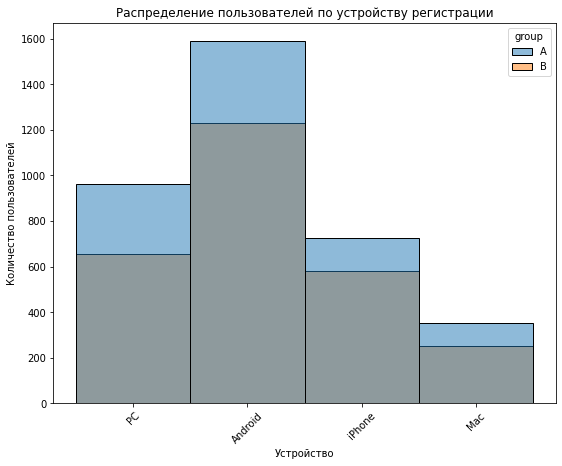

In [ ]:
plt.figure(figsize=(9,7))

data = recommender_system_test
x = 'device'
hue = 'group'

sns.histplot(data=data, x=x, hue=hue)
plt.title('Распределение пользователей по устройству регистрации')
plt.ylabel('Количество пользователей')
plt.xlabel('Устройство')
plt.xticks(rotation=45)
plt.show()

*Самое популярное устройство - Андроид.*

## Высчитаем горизонт проведения теста в 14 дней для каждого пользователя.

In [ ]:
recommender_system_test['end_test_date'] = recommender_system_test['first_date'] + dt.timedelta(days=13)

In [ ]:
recommender_system_test[recommender_system_test['end_test_date'] > '2020-12-30']['user_id'].nunique()

1925

*Для 1925 пользователей тест закончится после 30 декабря, данных о событиях за этот период у нас нет.*

In [ ]:
events_merged = events.merge(recommender_system_test, how='left', on='user_id') \
    .query('ab_test == "recommender_system_test"')

Отфильтруем все события за горизонтом 14 дней.

In [ ]:
events_merged = events_merged.query('event_dt <= end_test_date')

## Построим график распределения событий по пользователям.

In [ ]:
event_per_user_distrib = events_merged.groupby(['user_id', 'group'], as_index=False)['event_dt'].count()

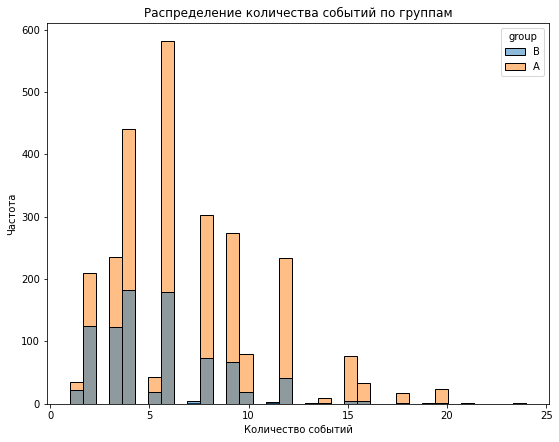

In [ ]:
plt.figure(figsize=(9,7))

sns.histplot(data=event_per_user_distrib, x='event_dt', hue='group', alpha=0.5)

plt.title('Распределение количества событий по группам')
plt.ylabel('Частота')
plt.xlabel('Количество событий')

plt.show()

*Пользователи группы В реже совершают активные действия и в целом их меньше.*

## Построим график распределения событий по дням.

In [ ]:
events_by_date_distrib = events_merged.groupby(['group','event_dt'], as_index=False)['event_name'].count()

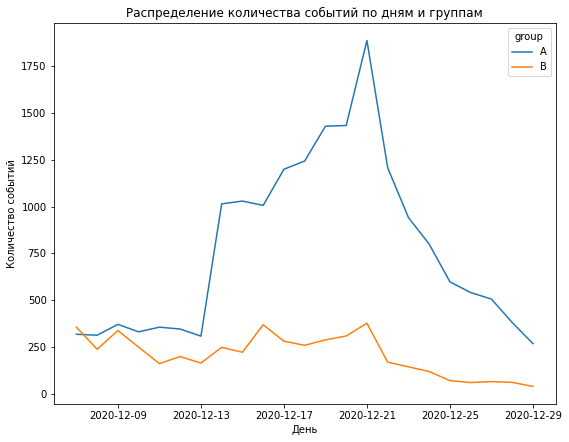

In [ ]:
plt.figure(figsize=(9,7))

sns.lineplot(data=events_by_date_distrib, x='event_dt', y='event_name', hue='group')

plt.title('Распределение количества событий по дням и группам')
plt.ylabel('Количество событий')
plt.xlabel('День')

plt.show()

*Пользователи в группе А более активны, особенно в период с 13 декабря и до конца логирования.*   
*Также характерно, что количество событий в обеих группах синхронно начало падать после последнего дня набора клиентов для эксперимента.*

## Посчитаем активность в каждой группе.

In [ ]:
events_merged.groupby('group')['event_name'].count()

group
A    17835
B     4785
Name: event_name, dtype: int64

*Пользователи тестовой группы почти в 4 раза реже совершали какие-то действия.*

## Посмотрим соотношение активных/неактивных пользователей и есть ли какая-то корреляция неактивных пользователей с имеющимися признаками.

In [ ]:
inactive_users = recommender_system_test[~recommender_system_test['user_id'].isin(events_merged['user_id'])]
t = recommender_system_test.groupby('group')['user_id'].nunique().reset_index()
active_users = events_merged.groupby('group')['user_id'].nunique().reset_index()
tt = inactive_users.groupby('group')['user_id'].nunique().reset_index()
t = t.merge(active_users, how='left', on='group')
t = t.merge(tt, how='left', on='group')
t.columns = ['group', 'initial_users', 'active_users', 'inactive_users']
t['active_share'] = t['active_users'] / t['initial_users']
t['inactive_share'] = t['inactive_users'] / t['initial_users']
t

,group,initial_users,active_users,inactive_users,active_share,inactive_share
0,A,3634,2604,1030,0.716566,0.283434
1,B,2717,877,1840,0.322782,0.677218


*Активных пользователей из тестовой группы после регистрации осталось лишь 32% и 71% из контрольной.*

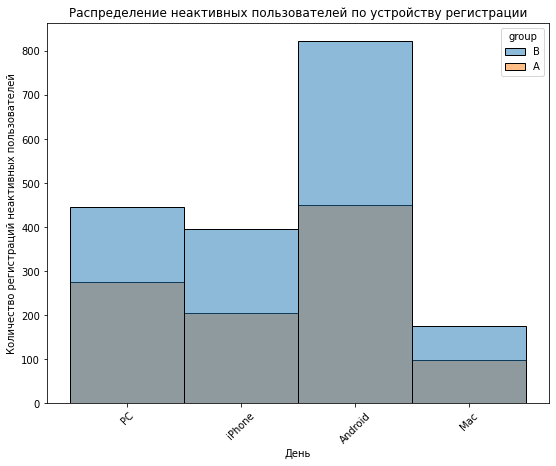

In [ ]:
plt.figure(figsize=(9,7))

data = inactive_users
x = 'device'
hue = 'group'

sns.histplot(data=data, x=x, hue=hue)
plt.title('Распределение неактивных пользователей по устройству регистрации')
plt.ylabel('Количество регистраций неактивных пользователей')
plt.xlabel('День')
plt.xticks(rotation=45)
plt.show()

*Явной зависимости от устройства не прослеживается.*

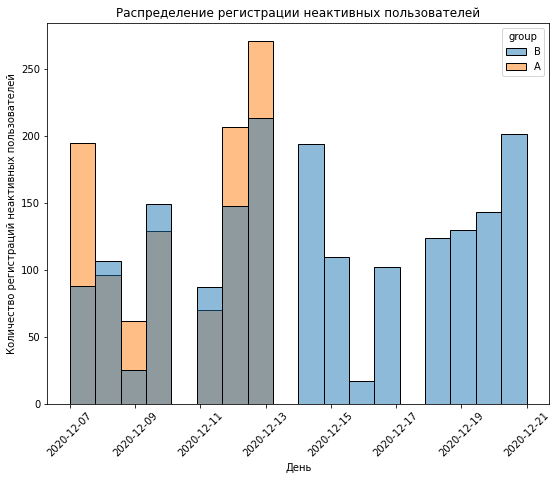

In [ ]:
plt.figure(figsize=(9,7))

data = inactive_users
x = 'first_date'
hue = 'group'

sns.histplot(data=data, x=x, hue=hue)
plt.title('Распределение регистрации неактивных пользователей')
plt.ylabel('Количество регистраций неактивных пользователей')
plt.xlabel('День')
plt.xticks(rotation=45)
plt.show()

*После 13 декабря неактивные пользователи попадали только в тестовую группу, возможно был какой-то баг и его пофиксили только для группы А, но такое распределение неактивных пользователей негативно отразится на результатах теста.*

## Посмотрим все ли пользователи из группы В после 13 декабря не совершали никаких действий.

In [ ]:
events_merged[(events_merged['first_date'] > '2020-12-13') &
              (events_merged['group'] == 'B')]['user_id'].nunique() / recommender_system_test[
                  (recommender_system_test['first_date'] > '2020-12-13') & 
                  (recommender_system_test['group'] == 'B')]['user_id'].nunique()

0.3145539906103286

*Не у всех пользователей из группы В, зарегистрировавшихся после 13 декабря, были проблемы с доступом, 31% смогли что-то сделать.*

## Посмотрим на события в логе и их частоту.

In [ ]:
events_merged['event_name'].value_counts()

login           10217
product_page     6322
purchase         3103
product_cart     2978
Name: event_name, dtype: int64

*Интересно, что переходов в корзину меньше, чем покупок, возможно, на сайте есть возможность оформлять покупки не заходя в корзину.*

## Посмотрим на изменение конверсии на каждом этапе воронки для каждой группы.

Визуализируем воронку в табличной форме.

In [ ]:
users_by_events = pd.pivot_table(events_merged, index='group', 
                                 columns='event_name', values='user_id', 
                                 aggfunc='nunique').reset_index()

In [ ]:
users_by_events = users_by_events.merge(t[['group', 'initial_users']], how='left', on='group')
users_by_events = users_by_events[['group', 'initial_users', 'login', 'product_cart', 'product_page', 'purchase']]

In [ ]:
users_by_events['login_share'] = users_by_events[['initial_users','login']].pct_change(axis=1)['login']
users_by_events['product_cart_share'] = users_by_events[['login','product_cart']].pct_change(axis=1)['product_cart']
users_by_events['product_page_share'] = users_by_events[['product_cart','product_page']].pct_change(axis=1)['product_page']
users_by_events['purchase_share'] = users_by_events[['product_page','purchase']].pct_change(axis=1)['purchase']

In [ ]:
users_by_events

,group,initial_users,login,product_cart,product_page,purchase,login_share,product_cart_share,product_page_share,purchase_share
0,A,3634,2604,782,1685,833,-0.283434,-0.699693,1.154731,-0.505638
1,B,2717,876,244,493,249,-0.677586,-0.721461,1.020492,-0.494929


*С учетом обнаруженных различий в неактивных пользователях конверсия говорит сама за себя.*

Визуализируем воронку в графической форме.

In [ ]:
fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'A',
    y = ['Регистрация', 'Логин', 'Страница товара', 'Корзина', 'Страница подтверждения оплаты'],
    x = [users_by_events.loc[0,'initial_users'],
         users_by_events.loc[0,'login'],
         users_by_events.loc[0, 'product_page'],
         users_by_events.loc[0, 'product_cart'],
         users_by_events.loc[0, 'purchase']],
    textinfo = "value+percent previous"))

fig.add_trace(go.Funnel(
    name = 'B',
    y = ['Регистрация', 'Логин', 'Страница товара', 'Корзина', 'Страница подтверждения оплаты'],
    x = [users_by_events.loc[1,'initial_users'],
         users_by_events.loc[1, 'login'],
         users_by_events.loc[1, 'product_page'],
         users_by_events.loc[1, 'product_cart'],
         users_by_events.loc[1, 'purchase']],
    textinfo = "value+percent previous"))

fig.update_layout(title='Воронка переходов')
fig.show()

*В целом конверсия в контрольной группе в абсолютных цифрах лучше, за исключением этапа корзины.*

**Выводы:** перед началом анализа теста нужно подчеркнуть выявленные негативные факторы, которые могут повлиять на результаты:   
1) Датасет событий не покрывает весь период теста для 1925 пользователей   
2) Неравномерное распределение неактивных пользователей, которые регистрировались после 13 декабря. Все неактивные попали в тестовую группу.   
3) Период проведения теста совпадает с проведением параллельного теста, в оба теста попали 25% пользователей исследуемого теста.   
4) Выбран не самый удачный период проведения - параллельно в регионе проходит рождественская промо акция.   
5) Среди участников теста оказались пользователи из других регионов.   
6) Информации о базовой конверсии у нас нет, поэтому проверить корректность определения количества участников мы не можем.

# Оценка результатов А/В теста<a id=5></a>

## Проверим ститистическую разницу конверсии на каждом этапе воронки между группами.

H0 - конверсия в тестовой группе (В) больше.   
H1 - конверсия в тестовой группе (В) меньше.   
Установим уровень значимости 5%.

In [ ]:
# функция для z теста с бутстрапированием с применением поправки Шидака
def conversion_bs_ztest_sidak(event):

    alpha = 0.05
    
    sample_successes_a = pd.Series(users_by_events.loc[0, event]*[1])
    sample_successes_b = pd.Series(users_by_events.loc[1, event]*[1])

    sample_tries_a = pd.Series((users_by_events.loc[0, 'initial_users'] - users_by_events.loc[0, event])*[0])
    sample_tries_b = pd.Series((users_by_events.loc[1, 'initial_users'] - users_by_events.loc[1, event])*[0])

    sample_a = sample_successes_a.append(sample_tries_a, ignore_index=True)
    sample_b = sample_successes_b.append(sample_tries_b, ignore_index=True)

    result = []
    sample_size = 2500

    for _ in tqdm(range(10000)):
        a = np.random.choice(sample_a,size=sample_size)
        b = np.random.choice(sample_b,size=sample_size)
        pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)], alternative='larger')[1]
        result.append(pval)

    pval_corrected = multitest.multipletests(result, alpha, method='sidak', is_sorted=False, returnsorted=False)[1]

    if pd.Series(pval_corrected).mean() > alpha:
        return print(f'Не можем отклонить Н0.\nP-value: {pd.Series(pval_corrected).mean()}')
    else:
        return print(f'Отклоняем Н0.\nP-value: {pd.Series(pval_corrected).mean()}')

In [ ]:
conversion_bs_ztest_sidak('login')

  0%|          | 0/10000 [00:00<?, ?it/s]

Отклоняем Н0.
P-value: 0.0


In [ ]:
conversion_bs_ztest_sidak('product_cart')

  0%|          | 0/10000 [00:00<?, ?it/s]

Отклоняем Н0.
P-value: 0.0


In [ ]:
conversion_bs_ztest_sidak('product_page')

  0%|          | 0/10000 [00:00<?, ?it/s]

Отклоняем Н0.
P-value: 0.0


In [ ]:
conversion_bs_ztest_sidak('purchase')

  0%|          | 0/10000 [00:00<?, ?it/s]

Отклоняем Н0.
P-value: 0.0


**Выводы:** критерий нашел стат. значимые различия во всех сравнениях.
В сравнениях использовали поправку Шидака. Отклоняем нулевую гипотезу, конверсия в тестовой группе меньше на всех этапах воронки.

## Протестируем мощность теста.

Чтобы протестировать мощность теста определим effect size внутри функции.

In [ ]:
def test_power(event):
    sample_successes_a = pd.Series(users_by_events.loc[0, event]*[1])
    sample_tries_a = pd.Series((users_by_events.loc[0, 'initial_users'] - users_by_events.loc[0, event])*[0])

    sample_successes_b = pd.Series(users_by_events.loc[1, event]*[1])
    sample_tries_b = pd.Series((users_by_events.loc[1, 'initial_users'] - users_by_events.loc[1, event])*[0])

    sample_a = sample_successes_a.append(sample_tries_a, ignore_index=True)
    sample_b = sample_successes_b.append(sample_tries_b, ignore_index=True)

    cohens_d = (np.mean(sample_a) - np.mean(sample_b)) / (np.sqrt((np.std(sample_a) ** 2 + np.std(sample_b) ** 2) / 2))

    power_analysis = power.NormalIndPower().power

    return print(f'Мощность теста для сравнения конверсии на этапе {event}:', 
                 power_analysis(effect_size=cohens_d,
                                nobs1=len(sample_a), 
                                alpha=.05, 
                                ratio=len(sample_a) / len(sample_b) * len(sample_a), 
                                alternative='larger'))

In [ ]:
test_power('login')

Мощность теста для сравнения конверсии на этапе login: 1.0


In [ ]:
test_power('product_cart')

Мощность теста для сравнения конверсии на этапе product_cart: 1.0


In [ ]:
test_power('product_page')

Мощность теста для сравнения конверсии на этапе product_page: 1.0


In [ ]:
test_power('purchase')

Мощность теста для сравнения конверсии на этапе purchase: 1.0


**Выводы:** наш тест находит все true positive, что говорит о высокой надежности результатов.

# Выводы по исследовательскому анализу и проведенной оценке результатов А/В тестирования.<a id=6></a>

Маркетинговый отдел предположил, что после изменения рекомендательной системы, конверсия на всех этапах пользовательской воронки вырастет на >= 10%. Планировалось набирать пользователей в тест на протяжении 2 недель с 7 по 21 декабря и тестировать их в лайфтайме 14 дней. Мы выделили 4 этапа воронки событий для пользователя, судя по конверсии, этап с корзиной не обязательный и можно совершать покупки, не заходя в нее.    
Больше всего мы теряем пользователей на этапе перехода от логина на страницу товара - почти 70% в контрольной группе.    
Конверсия для группы В нерепрезентативна ввиду аномалии которую мы обнаружили при исследовательском анализе, а именно - неравномерность распределения пассивных пользователей (которые после регистрации не совершали никаких действий), с 13 декабря все такие пользователи попадали в тестовую группу, из-за чего по всем проанализированным метрикам наблюдался большой перекос в сторону контрольной группы.   
Помимо этого, мы обнаружили следующие проблемы при проведении теста:

1) Пользовательские группы неравномерно разбиты - пропорции 43% / 57% (тест/контроль).    

2) 25% пользователей также попали в группы параллельно идущего теста, мы их оставили, поскольку они распределены между группами теста в соответствии с общими пропорциями.    

3) В тест попали 15% новых пользователей из EU, что соответствует ТЗ. Но в участниках также были пользователи других регионов, мы исключили их из анализа. Пользователей, попавших в обе группы сразу, нет.   

4) Датасет событий не покрывает весь период теста для 1925 пользователей. Для анализа мы использовали всех пользователей, включая тех, чей лайфтайм ограничился 30 декабря.     

5) Выбран не самый удачный период проведения - параллельно в регионе проходит рождественская промо акция.    

Мы провели проверку гипотезы о том, что все метрики, а именно, посещение пользователями страницы товара, корзины и покупки в тесте будут на 10% выше, чем в контроле.   
Внутри гипотезы у нас получилось 4 стат. теста для каждого этапа воронки, в результате которых, используя поправку Шидака, мы отвергли все нулевые гипотезы, а тест на проверке показал 100% мощность, что означает, что вероятность ошибочно отклонить нулевую гипотезу при том, что она верна, равна 0.

Однако, с учетом всех обнаруженных проблем при проведении эксперимента, мы не можем достоверно утверждать о правильности отклонения нашей гипотезы, и наилучшим вариантом было бы проведение повторного теста с дополнительной контрольной группой.